In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

import glob
from PIL import Image
from scipy import interpolate

In [48]:
# Get all the csv files in the current directory
csv_files = glob.glob("../../experiments/logs/simdata/mlp-sparsity/*.csv")

# Create a list of dataframes
dfs = []

# Iterate over the csv files
for csv_file in csv_files:

    # Read the csv file into a dataframe
    df = pd.read_csv(csv_file)
    # Append the dataframe to the list of dataframes
    dfs.append(df)

# Concatenate the dataframes into a single dataframe
df = pd.concat(dfs)

In [49]:
num_epochs = 5000
df

,A_000,A_001,A_002,A_010,A_011,A_012,A_020,A_021,A_022,A_100,...,num_blocks,log_expdata,use_experimental_data,neural_recording_sparsity,jobid,input_firing_mean,input_noise,l1_regularization,moving_avg_window,trainable_coeffs
0,0.001013,0.001005,-1.008475e-05,0.000997,0.000986,-0.000016,0.001008,0.001005,-7.643724e-07,1.009956e-03,...,3,True,False,1.0,1,1,0.1,0.005,10,18
1,-0.002402,-0.012760,-1.008475e-05,0.042217,0.000194,-0.000016,0.000584,-0.005431,-7.643724e-07,7.902514e-03,...,3,True,False,1.0,1,1,0.1,0.005,10,18
2,-0.001844,-0.017463,-1.008475e-05,0.036621,-0.000103,-0.000016,0.000063,-0.002953,-7.643724e-07,5.151264e-03,...,3,True,False,1.0,1,1,0.1,0.005,10,18
3,-0.001911,-0.018219,-1.008475e-05,0.023015,0.000003,-0.000016,0.000029,-0.000016,-7.643724e-07,2.770273e-03,...,3,True,False,1.0,1,1,0.1,0.005,10,18
4,-0.001870,-0.016455,-1.008475e-05,0.012709,0.000272,-0.000016,-0.000012,-0.000011,-7.643724e-07,9.716141e-04,...,3,True,False,1.0,1,1,0.1,0.005,10,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.008286,0.059639,3.719089e-07,-0.000043,-0.000088,0.000007,-0.000011,0.000086,2.838189e-07,-8.384304e-07,...,3,True,False,0.5,9,1,0.1,0.005,10,18
196,-0.008241,0.059638,3.719089e-07,0.000031,-0.000007,0.000007,-0.000046,0.000055,2.838189e-07,5.665857e-06,...,3,True,False,0.5,9,1,0.1,0.005,10,18
197,-0.008208,0.059656,3.719089e-07,-0.000125,0.000188,0.000007,0.000007,-0.000012,2.838189e-07,3.842300e-05,...,3,True,False,0.5,9,1,0.1,0.005,10,18
198,-0.008148,0.059681,3.719089e-07,0.000089,-0.000140,0.000007,-0.000005,0.000025,2.838189e-07,2.829158e-06,...,3,True,False,0.5,9,1,0.1,0.005,10,18


In [50]:
coeffs, other_columns = [], []

for i in range(3):
        for j in range(3):
            for k in range(3):
                coeffs.append(f"A_{i}{j}{k}")

for column in df.columns:
    if column not in set(coeffs):
        other_columns.append(column)
print(other_columns)

['epoch', 'loss', 'r2_score', 'num_exps', 'num_epochs', 'trials_per_block', 'log_interval', 'num_blocks', 'log_expdata', 'use_experimental_data', 'neural_recording_sparsity', 'jobid', 'input_firing_mean', 'input_noise', 'l1_regularization', 'moving_avg_window', 'trainable_coeffs']


In [51]:
df.drop(df[df["num_epochs"] != num_epochs].index, inplace=True)

for coeff in coeffs:
    df[coeff] = pd.to_numeric(df[coeff])
df["moving_avg_window"] = df["moving_avg_window"].astype(int)
df["trials_per_block"] = df["trials_per_block"].astype(int)

In [52]:
np.sort(df["jobid"].unique())
# df.dtypes

array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [75]:
df_subset = df.loc[(df['num_epochs'] == num_epochs) & (df['epoch'] == 4900) & ((df['neural_recording_sparsity'] == 0.) | (df['neural_recording_sparsity'] == 0.5) | (df['neural_recording_sparsity'] == 0.2))]
num_exps = len(df_subset)
df_subset.head(5)

,A_000,A_001,A_002,A_010,A_011,A_012,A_020,A_021,A_022,A_100,...,num_blocks,log_expdata,use_experimental_data,neural_recording_sparsity,jobid,input_firing_mean,input_noise,l1_regularization,moving_avg_window,trainable_coeffs
99,0.000112,-0.000168,-0.000010,-0.000038,-0.000112,-0.000016,0.000107,-0.000168,-7.643724e-07,0.000109,...,3,True,False,0.0,1,1,0.1,0.005,10,18
149,-0.005107,-0.005747,-0.000010,-0.000027,0.000131,-0.000016,0.000005,0.000052,-7.643724e-07,-0.000086,...,3,True,False,0.5,1,1,0.1,0.005,10,18
199,-0.001719,-0.000088,-0.000010,-0.000121,0.000046,-0.000016,0.000032,0.000133,-7.643724e-07,-0.000105,...,3,True,False,0.2,1,1,0.1,0.005,10,18
49,0.000109,-0.000039,0.000008,-0.000116,0.000112,-0.000002,0.000107,0.000107,-1.883750e-05,-0.000129,...,3,True,False,0.0,10,1,0.1,0.005,10,18
149,0.000204,0.060356,0.000008,0.000122,-0.000134,-0.000002,0.000037,0.000178,-1.883750e-05,-0.013662,...,3,True,False,0.2,10,1,0.1,0.005,10,18


In [76]:
# remove all second order weight terms!
for coeff in coeffs:
    if coeff[-1] == "2":
        df_subset = df_subset.drop(coeff, axis=1)

In [77]:
melted_df = pd.melt(df_subset, id_vars=other_columns, var_name="coeff_name", value_name="coeff_val").astype({'coeff_val': 'float'})
melted_df

,epoch,loss,r2_score,num_exps,num_epochs,trials_per_block,log_interval,num_blocks,log_expdata,use_experimental_data,neural_recording_sparsity,jobid,input_firing_mean,input_noise,l1_regularization,moving_avg_window,trainable_coeffs,coeff_name,coeff_val
0,4900,0.000009,-4.312345,1,5000,80,100,3,True,False,0.0,1,1,0.1,0.005,10,18,A_000,0.000112
1,4900,0.003850,-0.104155,1,5000,80,100,3,True,False,0.5,1,1,0.1,0.005,10,18,A_000,-0.005107
2,4900,0.002888,-0.855130,1,5000,80,100,3,True,False,0.2,1,1,0.1,0.005,10,18,A_000,-0.001719
3,4900,0.000007,-1.727994,1,5000,80,100,3,True,False,0.0,10,1,0.1,0.005,10,18,A_000,0.000109
4,4900,0.003436,-1.176508,1,5000,80,100,3,True,False,0.2,10,1,0.1,0.005,10,18,A_000,0.000204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,4900,0.002744,-1.310624,1,5000,80,100,3,True,False,0.2,8,1,0.1,0.005,10,18,A_221,-0.000090
914,4900,0.003821,-0.230232,1,5000,80,100,3,True,False,0.5,8,1,0.1,0.005,10,18,A_221,-0.000157
915,4900,0.000011,-3.661714,1,5000,80,100,3,True,False,0.0,9,1,0.1,0.005,10,18,A_221,0.000037
916,4900,0.002932,-2.936175,1,5000,80,100,3,True,False,0.2,9,1,0.1,0.005,10,18,A_221,-0.000039


<Figure size 432x288 with 0 Axes>

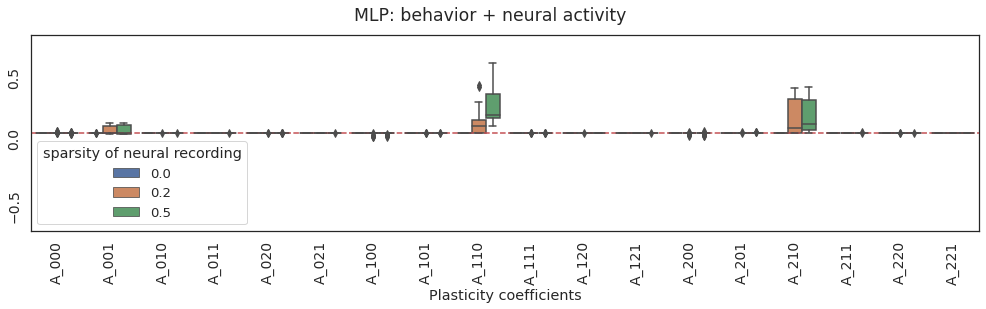

In [78]:
sns.set(font_scale = 1.2)
sns.set_style("white")
plt.tight_layout()

fig, axes = plt.subplots(nrows=1, ncols=1,  figsize=(17, 4), width_ratios=[6])

fig.suptitle('MLP: behavior + neural activity', fontsize="large")

axes.axhline(y=0, color='r', linestyle='--')
sns.boxplot(data=melted_df, x="coeff_name", y="coeff_val", hue="neural_recording_sparsity", ax=axes)
axes.set_xlabel("Plasticity coefficients")
axes.set_ylabel(None)
axes.set_ylim([-0.8, 0.8])
axes.tick_params(labelrotation=90, which="major", labelsize=14, color="black", direction='out')
axes.legend(title='sparsity of neural recording')

# axes[1].set_title('Final Loss')
# sns.boxplot(data=df_subset, x="neural_recording_sparsity", y="loss", hue="neural_recording_sparsity", width=0.4, ax=axes[1])
# axes[1].set_xlabel("neural_recording_sparsity")
# axes[1].set_ylabel(None)
# axes[1].set_ylim([0.50, 0.7])

# axes[1].get_legend().remove()
fig.subplots_adjust(bottom=0.2)

plt.savefig(f"imgs/mlp-sparsity.png", dpi=500)

In [80]:
df_subset = df.loc[(df['num_epochs'] == num_epochs) & (df['epoch'] == 4900) & (df['neural_recording_sparsity'] == 1.)]
num_exps = len(df_subset)
# remove all second order weight terms!
for coeff in coeffs:
    if coeff[-1] == "2":
        df_subset = df_subset.drop(coeff, axis=1)
        
df_subset.head(5)

,A_000,A_001,A_010,A_011,A_020,A_021,A_100,A_101,A_110,A_111,...,num_blocks,log_expdata,use_experimental_data,neural_recording_sparsity,jobid,input_firing_mean,input_noise,l1_regularization,moving_avg_window,trainable_coeffs
49,-0.007115,-0.007701,0.000050,-0.000125,-0.000053,0.000027,-0.000258,0.000058,0.243075,-0.000025,...,3,True,False,1.0,1,1,0.1,0.005,10,18
99,-0.009692,0.080737,-0.000135,0.000004,-0.000564,-0.000052,-0.000132,0.000416,0.135965,-0.000157,...,3,True,False,1.0,10,1,0.1,0.005,10,18
99,-0.000049,-0.004610,-0.000051,-0.000126,-0.000016,-0.000077,0.000003,-0.000043,0.584684,-0.000091,...,3,True,False,1.0,11,1,0.1,0.005,10,18
99,-0.000381,0.072447,0.000132,0.000124,0.000283,-0.000173,-0.000068,0.000005,0.149364,-0.000099,...,3,True,False,1.0,12,1,0.1,0.005,10,18
49,0.004244,0.002862,0.000083,-0.000097,0.000088,0.000044,-0.000134,-0.008001,0.488860,-0.000121,...,3,True,False,1.0,13,1,0.1,0.005,10,18


In [81]:
melted_df = pd.melt(df_subset, id_vars=other_columns, var_name="coeff_name", value_name="coeff_val").astype({'coeff_val': 'float'})
melted_df

,epoch,loss,r2_score,num_exps,num_epochs,trials_per_block,log_interval,num_blocks,log_expdata,use_experimental_data,neural_recording_sparsity,jobid,input_firing_mean,input_noise,l1_regularization,moving_avg_window,trainable_coeffs,coeff_name,coeff_val
0,4900,0.004803,0.281507,1,5000,80,100,3,True,False,1.0,1,1,0.1,0.005,10,18,A_000,-0.007115
1,4900,0.011432,-67.493865,1,5000,80,100,3,True,False,1.0,10,1,0.1,0.005,10,18,A_000,-0.009692
2,4900,0.006591,0.482610,1,5000,80,100,3,True,False,1.0,11,1,0.1,0.005,10,18,A_000,-0.000049
3,4900,0.004705,-2.580993,1,5000,80,100,3,True,False,1.0,12,1,0.1,0.005,10,18,A_000,-0.000381
4,4900,0.005277,0.057200,1,5000,80,100,3,True,False,1.0,13,1,0.1,0.005,10,18,A_000,0.004244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,4900,0.005160,0.750457,1,5000,80,100,3,True,False,1.0,5,1,0.1,0.005,10,18,A_221,-0.000031
302,4900,0.004805,-0.219855,1,5000,80,100,3,True,False,1.0,6,1,0.1,0.005,10,18,A_221,0.000276
303,4900,0.005883,0.676547,1,5000,80,100,3,True,False,1.0,7,1,0.1,0.005,10,18,A_221,0.000070
304,4900,0.004759,0.387030,1,5000,80,100,3,True,False,1.0,8,1,0.1,0.005,10,18,A_221,0.000115


<Figure size 432x288 with 0 Axes>

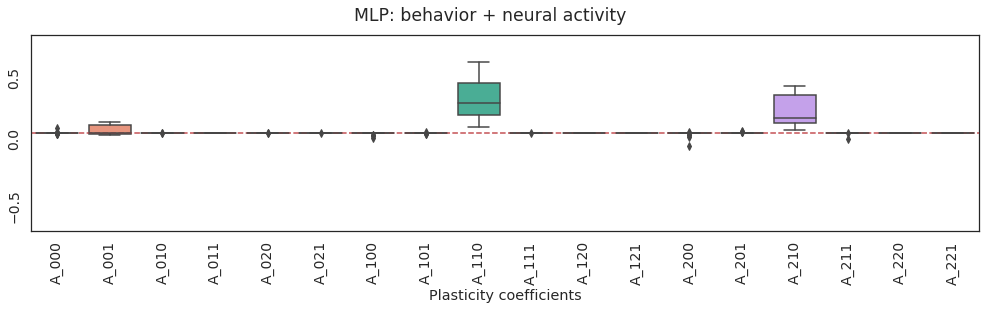

In [83]:
sns.set(font_scale = 1.2)
sns.set_style("white")
plt.tight_layout()

fig, axes = plt.subplots(nrows=1, ncols=1,  figsize=(17, 4), width_ratios=[6])

fig.suptitle('MLP: behavior + neural activity', fontsize="large")

axes.axhline(y=0, color='r', linestyle='--')
sns.boxplot(data=melted_df, x="coeff_name", y="coeff_val", ax=axes)
axes.set_xlabel("Plasticity coefficients")
axes.set_ylabel(None)
axes.set_ylim([-0.8, 0.8])
axes.tick_params(labelrotation=90, which="major", labelsize=14, color="black", direction='out')
# axes.legend(title='sparsity of neural recording')

fig.subplots_adjust(bottom=0.2)

plt.savefig(f"imgs/mlp-neural-behavior.png", dpi=500)